In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Marketing_Analysis.csv", skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Data Cleaning 

In [3]:
df['job'] = df['jobedu'].apply(lambda _:_.split(",")[0])
df['education'] = df['jobedu'].apply(lambda _:_.split(",")[1])

In [4]:
df = df.loc[:, ['job', 'education' ,'salary', 'balance', 'age', 'response', 'marital']]
df.isnull().sum()

job           0
education     0
salary        0
balance       0
age          20
response     30
marital       0
dtype: int64

In [5]:
df = df[~df.age.isnull()]
df = df[~df.response.isnull()]
df.head()

,job,education,salary,balance,age,response,marital
0,management,tertiary,100000,2143,58.0,no,married
1,technician,secondary,60000,29,44.0,no,single
2,entrepreneur,secondary,120000,2,33.0,no,married
3,blue-collar,unknown,20000,1506,47.0,no,married
4,unknown,unknown,0,1,33.0,no,single


# univariate analysis

<AxesSubplot:>

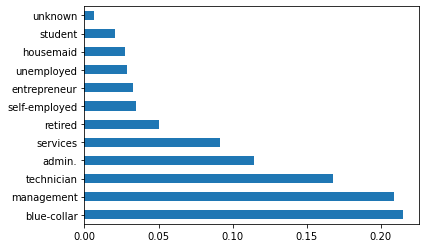

In [7]:
df.job.value_counts(normalize=True).plot.barh()

<AxesSubplot:ylabel='education'>

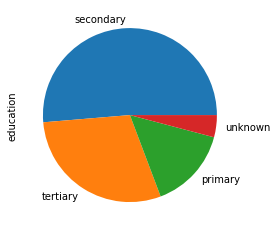

In [9]:
df.education.value_counts(normalize=True).plot.pie()

# bivariate analysis

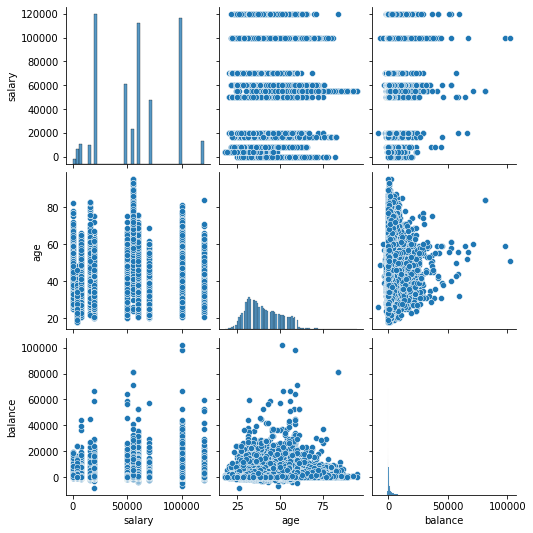

In [12]:
sns.pairplot(data=df, vars=['salary', 'age', 'balance'])

<AxesSubplot:>

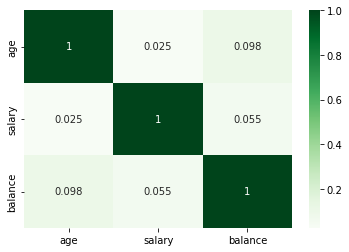

In [13]:
sns.heatmap(df[['age', 'salary', 'balance']].corr(), annot=True, cmap='Greens')

# numeric categorical analysis

In [14]:
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [15]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

### responses from higher earner tend to be more on the positive side

/home/dhruv/Desktop/projects/Data Science Portfolio/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response', ylabel='salary'>

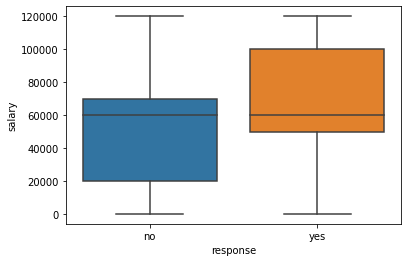

In [17]:
sns.boxplot(df.response, df.salary)


# multivariate analysis